# Stochastic Method Sensitivity Analysis

A sensitivity analysis for the parameters of the stochastic method. First we make a reference model of which we then vary the parameters one by one. For this reference model we also obtain the response spectrum with the Akkar (2014) GMPE to compare.

## Reference model

A M7 earthquake at a distance of 45 km.

In [1]:
import numpy as np

from synthacc.response import RVTCalculator, plot_response_spectra
from synthacc.stochastic import OmegaSquareSourceModel, GeometricalSpreadingModel, QModel, AttenuationModel, plot_geometrical_spreading_models, plot_q_models, plot_attenuation_models
from synthacc.gmpes import GMPE
from synthacc.source.moment import mw_to_m0


src_lon, src_lat = 5.676486, 51.166438
mol_lon, mol_lat = 5.086188, 51.213549

r_epi = 45 ## km

frequencies = np.logspace(-2, 2, 500)

magnitude = 7
ref_stress_drop = 100 * 10**5 ## Pa
ref_radiation_pattern = 0.55
ref_partition_factor = 1 / np.sqrt(2)
free_surface_factor = 2

density = 2800 ## kg/m3
velocity = 3700 ## m/s

m0 = mw_to_m0(magnitude)

ref_source_model = OmegaSquareSourceModel(
        m0, ref_stress_drop, ref_radiation_pattern, ref_partition_factor, free_surface_factor, density, velocity)

ref_gsm = GeometricalSpreadingModel([(1, -1)])

qr1 = 1000
ft1 = 0.2
fr1 = 0.02
s1 = 0.0
qr2 = 1272
ft2 = 1.4242
fr2 = 3.02
s2 = 0.32

ref_q_model = QModel(fr1, qr1, s1, ft1, ft2, fr2, qr2, s2)

ref_c_q = 3.7
ref_kappa = 0.02

ref_attenuation_model = AttenuationModel(ref_q_model, ref_c_q, ref_kappa)

periods = np.logspace(-2, 1, 500)

ref_duration = 10

ref_fas = ref_source_model(frequencies, gmt='acc') * ref_gsm(r_epi) * ref_attenuation_model(r_epi, frequencies)

rvt_calc = RVTCalculator()
ref_rs = rvt_calc.get_response_spectrum(ref_fas, periods, ref_duration)

gmpe = GMPE('AkkarEtAlRepi2014')
parameters = {'mag': magnitude, 'rake': 90, 'repi': r_epi*1000, 'vs30': 800}
gmpe_rs = gmpe.get_response_spectrum(parameters)[0]

plot_response_spectra([ref_rs, gmpe_rs], labels=['Reference model', 'GMPE'], unit='m/s2')

<Figure size 640x480 with 1 Axes>

## Stress drop

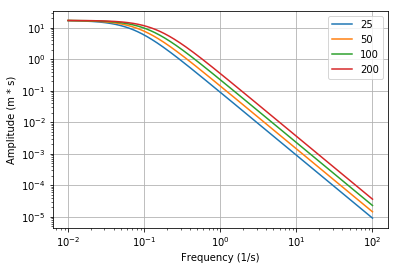

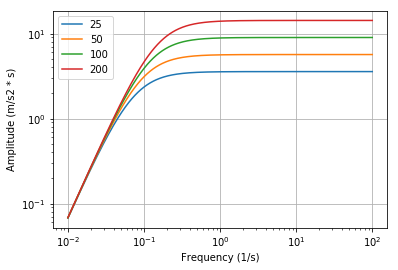

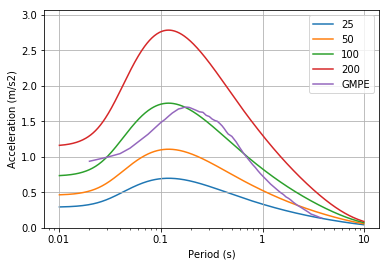

In [2]:
from synthacc.spectral import plot_fass


stress_drops = [25 * 10**5, 50 * 10**5, 100 * 10**5, 200 * 10**5] ## Pa

labels = [int(sd/10**5) for sd in stress_drops]

source_models = []
for stress_drop in stress_drops:
    source_model = OmegaSquareSourceModel(
        m0, stress_drop, ref_radiation_pattern, ref_partition_factor, free_surface_factor, density, velocity)
    source_models.append(source_model)

plot_fass([sm(frequencies, gmt='dis') for sm in source_models], labels=labels)
plot_fass([sm(frequencies, gmt='acc') for sm in source_models], labels=labels)

rss = []
for sm in source_models:
    fas = sm(frequencies, gmt='acc') * ref_gsm(r_epi) * ref_attenuation_model(r_epi, frequencies)
    rs = rvt_calc.get_response_spectrum(fas, periods, ref_duration)
    rss.append(rs)

rss.append(gmpe_rs), labels.append('GMPE')

plot_response_spectra(rss, labels=labels, unit='m/s2')

## Radiation pattern

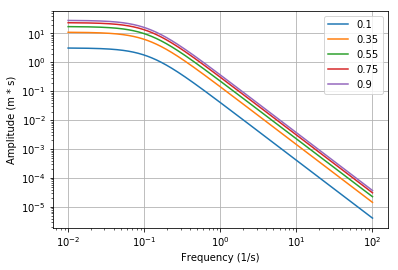

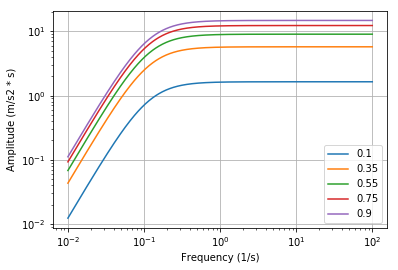

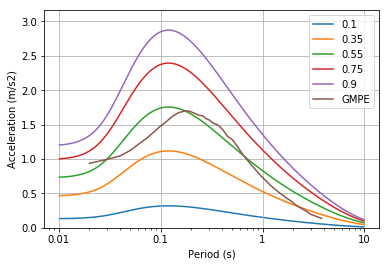

In [3]:
radiation_patterns = [0.1, 0.35, 0.55, 0.75, 0.9]

labels = radiation_patterns

source_models = []
for radiation_pattern in radiation_patterns:
    source_model = OmegaSquareSourceModel(
        m0, ref_stress_drop, radiation_pattern, ref_partition_factor, free_surface_factor, density, velocity)
    source_models.append(source_model)

plot_fass([sm(frequencies, gmt='dis') for sm in source_models], labels=labels)
plot_fass([sm(frequencies, gmt='acc') for sm in source_models], labels=labels)

rss = []
for sm in source_models:
    fas = sm(frequencies, gmt='acc') * ref_gsm(r_epi) * ref_attenuation_model(r_epi, frequencies)
    rs = rvt_calc.get_response_spectrum(fas, periods, ref_duration)
    rss.append(rs)

rss.append(gmpe_rs), labels.append('GMPE')

plot_response_spectra(rss, labels=labels, unit='m/s2')

## Partition factor

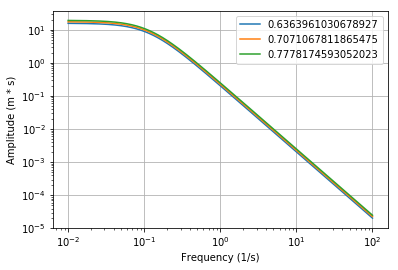

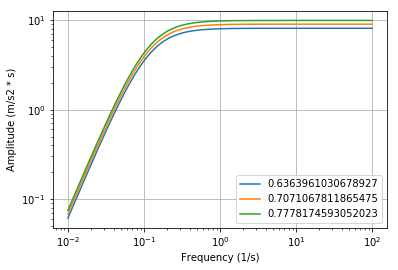

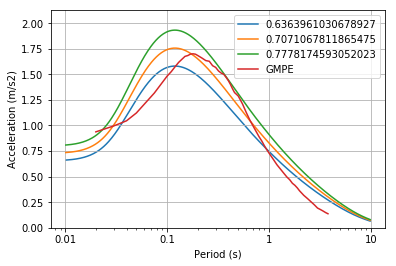

In [4]:
partition_factors = [ref_partition_factor*0.9, ref_partition_factor, ref_partition_factor*1.1]

labels = partition_factors

source_models = []
for partition_factor in partition_factors:
    source_model = OmegaSquareSourceModel(
        m0, ref_stress_drop, ref_radiation_pattern, partition_factor, free_surface_factor, density, velocity)
    source_models.append(source_model)

plot_fass([sm(frequencies, gmt='dis') for sm in source_models], labels=labels)
plot_fass([sm(frequencies, gmt='acc') for sm in source_models], labels=labels)

rss = []
for sm in source_models:
    fas = sm(frequencies, gmt='acc') * ref_gsm(r_epi) * ref_attenuation_model(r_epi, frequencies)
    rs = rvt_calc.get_response_spectrum(fas, periods, ref_duration)
    rss.append(rs)

rss.append(gmpe_rs), labels.append('GMPE')

plot_response_spectra(rss, labels=labels, unit='m/s2')

## Geometrical spreading

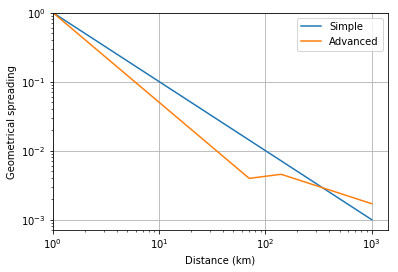

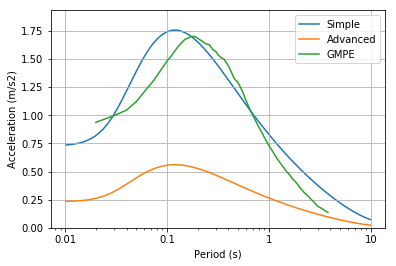

In [5]:
gsm1 = GeometricalSpreadingModel([(1, -1)])
gsm2 = GeometricalSpreadingModel([(1, -1.3), (70, 0.2), (140, -0.5)])

gsms = [gsm1, gsm2]

labels = ['Simple', 'Advanced']

plot_geometrical_spreading_models(gsms, np.logspace(0, 3, 100), labels=labels)

rss = []
for gsm in gsms:
    fas = ref_source_model(frequencies, gmt='acc') * gsm(r_epi) * ref_attenuation_model(r_epi, frequencies)
    rs = rvt_calc.get_response_spectrum(fas, periods, ref_duration)
    rss.append(rs)


rss.append(gmpe_rs), labels.append('GMPE')

plot_response_spectra(rss, labels=labels, unit='m/s2')

## Q model

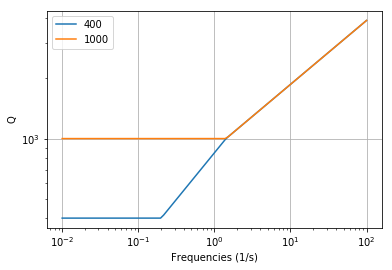

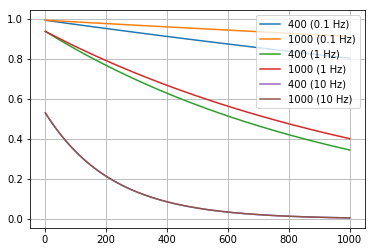

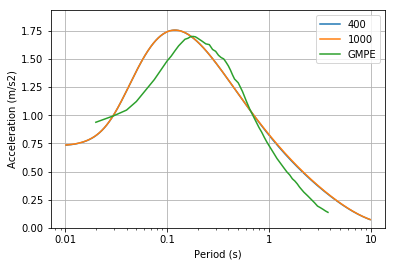

In [6]:
qr1s = [400, 1000]
ft1 = 0.2
fr1 = 0.02
s1 = 0.0
qr2 = 1272
ft2 = 1.4242
fr2 = 3.02
s2 = 0.32


q_models = [QModel(fr1, qr1, s1, ft1, ft2, fr2, qr2, s2) for qr1 in qr1s]
attenuation_models = [AttenuationModel(q_model, ref_c_q, ref_kappa) for q_model in q_models]

labels = [str(qr1) for qr1 in qr1s]

plot_q_models(q_models, np.logspace(-2, 2, 100), labels=labels)
plot_attenuation_models(attenuation_models, np.logspace(0, 3, 100), frequencies=[0.1, 1, 10], labels=labels)

rss = []
for attenuation_model in attenuation_models:
    fas = ref_source_model(frequencies, gmt='acc') * ref_gsm(r_epi) * attenuation_model(r_epi, frequencies)
    rs = rvt_calc.get_response_spectrum(fas, periods, ref_duration)
    rss.append(rs)

rss.append(gmpe_rs), labels.append('GMPE')

plot_response_spectra(rss, labels=labels, unit='m/s2')

## Kappa

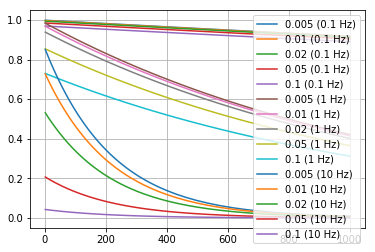

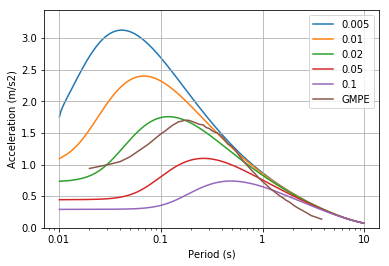

In [7]:
kappas = [0.005, 0.01, ref_kappa, 0.05, 0.1]

attenuation_models = [AttenuationModel(ref_q_model, ref_c_q, kappa) for kappa in kappas]

labels = kappas

plot_attenuation_models(attenuation_models, np.logspace(0, 3, 100), frequencies=[0.1, 1, 10], labels=labels)

rss = []
for attenuation_model in attenuation_models:
    fas = ref_source_model(frequencies, gmt='acc') * ref_gsm(r_epi) * attenuation_model(r_epi, frequencies)
    rs = rvt_calc.get_response_spectrum(fas, periods, ref_duration)
    rss.append(rs)

rss.append(gmpe_rs), labels.append('GMPE')

plot_response_spectra(rss, labels=labels, unit='m/s2')

## Duration

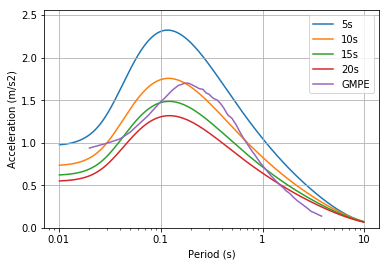

In [8]:
durations = [5, 10, 15, 20]

labels = ['%ss' % d for d in durations]

rss = []
for duration in durations:
    fas = ref_source_model(frequencies, gmt='acc') * ref_gsm(r_epi) * ref_attenuation_model(r_epi, frequencies)
    rs = rvt_calc.get_response_spectrum(fas, periods, duration)
    rss.append(rs)

rss.append(gmpe_rs), labels.append('GMPE')

plot_response_spectra(rss, labels=labels, unit='m/s2')